# Notebook : Extracting Metadata


## About

In this notebook, we will explore how to extract content from video. 

- metadata
- transcript
- core youtube frames

In [1]:
import rich
from pathlib import Path
import os
from IPython.display import Code


## Sample Video

In [2]:
from IPython.display import YouTubeVideo


In [3]:
video_id = 'ODluYyMZzs0'

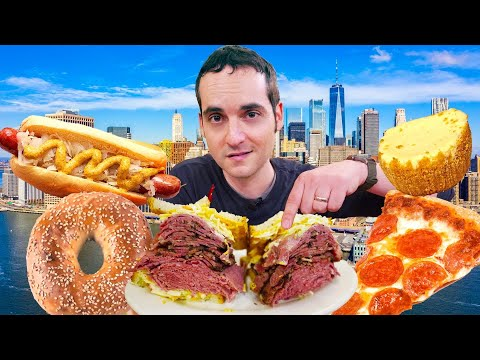

In [4]:
video_obj = YouTubeVideo(video_id, width=800, height=400)
video_obj

In [5]:
video_url = f"https://www.youtube.com/watch?v={video_id}"
print (video_url)

https://www.youtube.com/watch?v=ODluYyMZzs0


![Information in a youtube video](../images/video_metadata.png)


There is a lot of information in the youtube description. 

But a lot of space is taken for socials and affliate links.

## Extracting content (text)

### Metadata

There is a great library that makes it easy to extract youtube information

In [6]:
from pytubefix import YouTube

In [7]:
yt = YouTube(video_url)

basic video info

In [8]:
print (f"""

Title: {yt.title}
Author: {yt.author}
Publish Date: {yt.publish_date}
Video Length : {yt.length}

Video Id : {yt.video_id}
Channel Id : {yt.channel_id}
Thumbnail Url : {yt.thumbnail_url}
Watch Url : {yt.watch_url}


""")



Title: Top 5 NYC Foods You MUST TRY Before You Die!
Author: Here Be Barr
Publish Date: 2023-04-16 08:00:08-07:00
Video Length : 757

Video Id : ODluYyMZzs0
Channel Id : UCmKNW9ontOlTd_p4Dg51sRQ
Thumbnail Url : https://i.ytimg.com/vi/ODluYyMZzs0/sddefault.jpg?v=643c0345
Watch Url : https://youtube.com/watch?v=ODluYyMZzs0





description

In [9]:
print (yt.description)

For 24 Hours we'll eat the most iconic food that New York has to offer. From pizza, to pastrami, bagels, hot dogs and more, join us on this epic NYC Food Tour in 2023!
🎨 Buy an NYC Art Print/Postcard from Adriana's Store: https://www.etsy.com/shop/illustrationsbyadri
🛒 SHOP our NEW NYC Guides For Your Next Trip: http://www.thatch.co/@herebebarr
⭐ CHEAPEST Way To Book NYC Attractions:  https://gyg.me/J449y9gl

📝 GET Your FREE First-Timers GUIDE to NYC: https://my.ny-guide.com/freenycguide

✔️ SUBSCRIBE NOW! DON’T FORGET! The more the merrier! :)

🍕 Buy Me A Slice of Pizza: https://www.buymeacoffee.com/herebebarr
✈️ TRAVEL FOR FREE With These Rewards Credit Cards: http://bit.ly/328jVBX
👕 Buy Some Merchandise (T-Shirts/Hoodies/Coffee Mugs): https://teespring.com/stores/here-be-barrs-store

CONNECT-
✅ VISIT MY WEBSITE: http://www.ny-guide.com
✅ FOLLOW ME ON IG: http://www.instagram.com/here.be.barr
✅ FOLLOW ME ON TWITTER: http://www.twitter.com/herebebarr
✅ LIKE US ON FACEBOOK: http://www.

engagement info

In [10]:
print (f"""

Likes: {yt.likes}
Rating: {yt.rating}
Views: {yt.views}
Video Length : {yt.length}
""")



Likes: None
Rating: None
Views: 691241
Video Length : 757



Youtube Chapters

Video chapters add info and context to each portion of the video and let you easily rewatch different parts of the video. 

Creators can add their own video chapters for each uploaded video or rely on automatic video chapters.

[Link](https://support.google.com/youtube/answer/9884579?hl=en)

In [11]:
rich.print( yt.chapters)

[
    <Chapter: Intro | 0:00:00>,
    <Chapter: 1) Absolute Bagels- 2788 Broadway (b/w 107th and 108th), New York, NY | 0:00:18>,
    <Chapter: 2) Billy's Hot Dog Cart- 93rd and Central Park West, New York, NY | 0:02:38>,
    <Chapter: 3) Sarge's Deli- 548 3rd Ave. bwn 36th and 37th New York, NY | 0:05:37>,
    <Chapter: 4) Bleecker Street Pizza- 69 7th Ave S, New York, NY | 0:07:50>,
    <Chapter: 5) Eileen's Special Cheesecake- 17 Cleveland Pl, New York, NY | 0:10:38>
]

heatmap

data about "most replayed" graph for videos on Youtube.



In [12]:
rich.print(yt.replayed_heatmap[:5])


[
    {'start_seconds': 0.0, 'duration': 7.57, 'norm_intensity': 0.4575291672812642},
    {'start_seconds': 7.57, 'duration': 7.57, 'norm_intensity': 0.040002022452298704},
    {'start_seconds': 15.14, 'duration': 7.57, 'norm_intensity': 0.1911015884195596},
    {'start_seconds': 22.71, 'duration': 7.57, 'norm_intensity': 0.18164624954898315},
    {'start_seconds': 30.28, 'duration': 7.57, 'norm_intensity': 0.1407469146787192}
]

### Youtube Transcript

In [13]:
from youtube_transcript_api import YouTubeTranscriptApi 
import re

In [14]:
video_url

'https://www.youtube.com/watch?v=ODluYyMZzs0'

In [15]:
transcript_dict = YouTubeTranscriptApi.get_transcript(video_id)

In [16]:
rich.print (transcript_dict )

[
    {'text': 'New York City has some absolutely iconic', 'start': 0.0, 'duration': 4.62},
    {'text': "food and today that's all I'm going to", 'start': 2.76, 'duration': 3.48},
    {'text': "be eating we'll show you New York's best", 'start': 4.62, 'duration': 4.86},
    {'text': 'bagels hot dogs Pastrami and more get', 'start': 6.24, 'duration': 6.0},
    {'text': 'ready for the ultimate NYC food tour and', 'start': 9.48, 'duration': 5.159},
    {'text': 'this video is filmed in order so you can', 'start': 12.24, 'duration': 4.56},
    {'text': 'literally turn this into a bucket list', 'start': 14.639, 'duration': 6.14},
    {'text': 'New York City Food Adventure if you want', 'start': 16.8, 'duration': 3.979},
    {'text': 'The Bagel the breakfast icon of New York', 'start': 23.18, 'duration': 5.62},
    {'text': 'City brought here by polish Jewish', 'start': 26.46, 'duration': 4.559},
    {'text': 'immigrants at the turn of the 20th', 'start': 28.8, 'duration': 4.2},
    {'text': 'century is there a more New York City', 'start': 31.019, 'duration': 4.2},
    {'text': 'breakfast than this debatable well you', 'start': 33.0, 'duration': 4.38},
    {'text': 'can tell they mean business when 12 30', 'start': 35.219, 'duration': 4.441},
    {'text': "on a Monday there's already a super long", 'start': 37.38, 'duration': 5.04},
    {'text': "line an absolute I've heard from so many", 'start': 39.66, 'duration': 4.5},
    {'text': 'is the best bagel in New York City and', 'start': 42.42, 'duration': 4.139},
    {'text': "this is the only spot in the video I've", 'start': 44.16, 'duration': 5.04},
    {'text': "never been to so let's find out oh those", 'start': 46.559, 'duration': 4.68},
    {'text': "look so good it's passing the visual", 'start': 49.2, 'duration': 3.12},
    {'text': 'test', 'start': 51.239, 'duration': 2.941},
    {'text': 'how are you can I get an everything', 'start': 52.32, 'duration': 3.8},
    {'text': 'bagel with scallion cream cheese please', 'start': 54.18, 'duration': 4.68},
    {'text': "no thank you all right let's investigate", 'start': 56.12, 'duration': 5.32},
    {'text': 'this is the Story of My Life Line dies', 'start': 58.86, 'duration': 5.04},
    {'text': 'the second we head out', 'start': 61.44, 'duration': 4.74},
    {'text': '[Music]', 'start': 63.9, 'duration': 4.38},
    {'text': 'everyone in New York generally thinks', 'start': 66.18, 'duration': 3.54},
    {'text': "where they're from has the best bagels", 'start': 68.28, 'duration': 3.12},
    {'text': 'their neighborhood spot is the best and', 'start': 69.72, 'duration': 3.439},
    {'text': "I've heard about absolute for years", 'start': 71.4, 'duration': 4.92},
    {'text': 'finally gonna be trying this legendary', 'start': 73.159, 'duration': 5.621},
    {'text': 'Bagel here Morningside Heights you know', 'start': 76.32, 'duration': 4.26},
    {'text': "didn't see a single tourist in line it", 'start': 78.78, 'duration': 4.019},
    {'text': 'was like all Columbia students all right', 'start': 80.58, 'duration': 5.96},
    {'text': "let's try this this looks amazing", 'start': 82.799, 'duration': 3.741},
    {'text': 'hmm chewy on the outside soft on the', 'start': 90.479, 'duration': 5.941},
    {'text': 'inside this is how a New York bagel has', 'start': 94.38, 'duration': 4.5},
    {'text': 'to be wow all these years living in the', 'start': 96.42, 'duration': 3.54},
    {'text': 'city a dozen years I never tried', 'start': 98.88, 'duration': 2.699},
    {'text': 'absolute people push me all the time to', 'start': 99.96, 'duration': 3.839},
    {'text': "try it but I'm glad I finally came that", 'start': 101.579, 'duration': 4.261},
    {'text': 'first impression instantly this is going', 'start': 103.799, 'duration': 3.601},
    {'text': 'towards the top of my list for New York', 'start': 105.84, 'duration': 2.33},
    {'text': 'City Bagels', 'start': 107.4, 'duration': 3.38},
    {'text': '[Music]', 'start': 108.17, 'dur

From above, we can see the transcript seems pretty good, but they are not full sentences.   

It doesn't capture punctuation and is of varing length.

### Youtube Transcript using LLamaHub Dataloader

[LlamaHub](https://llamahub.ai/)



In [17]:
from llama_index.readers.youtube_transcript import YoutubeTranscriptReader


In [18]:

loader = YoutubeTranscriptReader()
documents = loader.load_data(
    ytlinks=[video_url]
)

In [19]:
len(documents)

1

In [20]:
rich.print (documents[0] )

Document(
    id_='ODluYyMZzs0',
    embedding=None,
    metadata={'video_id': 'ODluYyMZzs0'},
    excluded_embed_metadata_keys=[],
    excluded_llm_metadata_keys=[],
    relationships={},
    text="New York City has some absolutely iconic\nfood and today that's all I'm going to\nbe eating we'll show 
you New York's best\nbagels hot dogs Pastrami and more get\nready for the ultimate NYC food tour and\nthis video is
filmed in order so you can\nliterally turn this into a bucket list\nNew York City Food Adventure if you want\nThe 
Bagel the breakfast icon of New York\nCity brought here by polish Jewish\nimmigrants at the turn of the 
20th\ncentury is there a more New York City\nbreakfast than this debatable well you\ncan tell they mean business 
when 12 30\non a Monday there's already a super long\nline an absolute I've heard from so many\nis the best bagel 
in New York City and\nthis is the only spot in the video I've\nnever been to so let's find out oh those\nlook so 
good it's passing the visual\ntest\nhow are you can I get an everything\nbagel with scallion cream cheese 
please\nno thank you all right let's investigate\nthis is the Story of My Life Line dies\nthe second we head 
out\n[Music]\neveryone in New York generally thinks\nwhere they're from has the best bagels\ntheir neighborhood 
spot is the best and\nI've heard about absolute for years\nfinally gonna be trying this legendary\nBagel here 
Morningside Heights you know\ndidn't see a single tourist in line it\nwas like all Columbia students all 
right\nlet's try this this looks amazing\nhmm chewy on the outside soft on the\ninside this is how a New York bagel
has\nto be wow all these years living in the\ncity a dozen years I never tried\nabsolute people push me all the 
time to\ntry it but I'm glad I finally came that\nfirst impression instantly this is going\ntowards the top of my 
list for New York\nCity Bagels\n[Music]\nwe're eating so much food today that I\ndid not want to get locks any of 
their\nsalmon choices the appetizing stuff I\nwant to try that at some point but I\nhave to tell you I'm struggling
right\nnow to think of a better Bagel I've ever\nhad in New York old statement coming I\nthink this is the best 
bagel I've ever\nhad in New York City I would put this in\na textbook for a New York City Bagel and\na very 
important note for you all hash\nonly I saw people rushing out telling\ntheir friends they'll go to the 
ATM\nmachine there was a little bit of\nconfusion with that but they don't take\npre-orders they don't do delivery 
they\ndo one thing they do it well Bagels cash\nonly and I mean they have that right\nthey've earned it in my 
opinion absolute\nBagels absolutely recommended what a\nstart to this iconic New York City food\ntour\nforeign\nTy 
more iconic in cinema than somebody\ngrabbing a straight hot dog in the city\nwell we've got Billy's here and 
the\nstory with him is we included him in our\nbest reviewed hot dog video last year\nand his hot dog stand really 
blew up an\ninternational popularity YouTube\nchannels covered him a lot of my viewers\nfrom all over the world 
said he was\nfantastic let's go pay him a visit and\nsee if he remembers us love it always a\nline Billy is a local
Legend I've been\ncoming to him since I was\nmid-30s oh wow I'm 67 years old 30 years\nhuh\nbest in the city well 
he's always here\nyeah people have been coming to this guy\nfor decades remember me best reviewed\nhot dogs in New 
York City\nuh we're doing different spots hot dogs\npastrami like the best of each category\nand your hot dog you 
deserve it man you\ndeserve it\noh yeah but you do a great job man so I\njust want to thank you\ntoo I appreciate 
it you got a hard job\nman you you got the whole neighborhood\nhere you know\nno no yeah okay got the baby yes 
sir\nhere he is six months\nhe's a big boy you're right she was\npregnant he tried your hot dog while\nstill in the
womb\nanything you want to say to the people\nthanks to everybody that's all than

In [21]:
type(documents[0])

llama_index.core.schema.Document

## Extracting content (video)

videos, frames, and will be saved here

In [22]:
from moviepy.editor import VideoFileClip


In [23]:
data_folder = "../data/"
Path(data_folder).mkdir(parents=True, exist_ok=True)

In [24]:
yt = YouTube(video_url, use_po_token=False)

In [25]:
yt

<pytubefix.__main__.YouTube object: videoId=ODluYyMZzs0>

In [27]:
output_path = os.path.join(data_folder, video_id)
video_file_path = os.path.join(output_path, "video.mp4")



In [28]:
yt.streams.get_highest_resolution().download(
        output_path=output_path, filename="video.mp4"
    )

'/home/jupyter/pydata_rag_video/notebooks/../data/ODluYyMZzs0/video.mp4'

to simplify the next section, all the code we went over is shared in a utility file

In [29]:
Code(filename='video_utils.py', language='python')


from moviepy.editor import VideoFileClip
from pathlib import Path
from pytubefix import YouTube
from pprint import pprint
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
from youtube_transcript_api import YouTubeTranscriptApi
import re


def get_video_metadata(yt:YouTube):
    #yt = YouTube(video_id)

    return {
        "video_id": yt.video_id,
        "title": yt.title,
        "author": yt.author,
        "keywords": yt.keywords,

        "publish_date": yt.publish_date.isoformat(),

        "length": yt.length,
        "likes": yt.likes,
        "views": yt.views,
        "channel_id": yt.channel_id,
        "thumbnail_url": yt.thumbnail_url,
        "description": yt.description,

    }


def get_youtube_id(link:str):
    """Extracts the video ID from a YouTube video link."""
    if "youtube.com" in link:
        pattern = r'youtube\.com/watch\?v=([a-zA-Z0-9_-]+)'
        video_id = re.search(pattern, link).group(1)
        return video_id
    elif "youtu.be" in link:
        pattern = r"youtu\.be/([a-zA-Z0-9_-]+)"
        video_id = re.search(pattern, link).group(1)
        return video_id
    else:
        return None

def get_transcript(video_id:str):
    try:
        transcript_dict = YouTubeTranscriptApi.get_transcript(video_id)
        final_transcript = " ".join(i["text"] for i in transcript_dict)
        return final_transcript , transcript_dict
    except Exception as e:
        print(e)


def get_transcript_time(link:str):
    """Gets the transcript of a YouTube video with timestamps."""
    video_id =get_youtube_id(link)

    try:
        transcript_dict = YouTubeTranscriptApi.get_transcript(video_id)
        final_transcript = ""
        for i in transcript_dict:
            timevar = round(float(i["start"]))
            hours = int(timevar // 3600)
            timevar %= 3600
            minutes = int(timevar // 60)
            timevar %= 60
            timevex = f"{hours:02d}:{minutes:02d}:{timevar:02d}"
            final_transcript += f'{i["text"]} "time:{timevex}" '
        return final_transcript
    except Exception as e:
        print(e)
        return video_id



def download_video(video_id:str, output_path):
    """
    Download a video from a given url and save it to the output path.

    Parameters:
    url (str): The url of the video to download.
    output_path (str): The path to save the video to.

    Returns:
    dict: A dictionary containing the metadata of the video.
    """

    url =  f"https://www.youtube.com/watch?v={video_id}"
    print (url)
    yt = YouTube(url, use_po_token=False)
    metadata = get_video_metadata(yt)

    transcript,transcript_dict = get_transcript(video_id)

    with open(os.path.join(output_path,"transcript.txt"),"w") as f:
        f.write(transcript)



    with open(os.path.join(output_path,"metadata.json"),"w") as f:
        json.dump(metadata,f, indent=4)

    yt.streams.get_highest_resolution().download(
        output_path=output_path, filename="video.mp4"
    )
    return metadata


def video_to_images(video_path, output_folder,fps=0.2):
    """
    Convert a video to a sequence of images and save them to the output folder.

    Parameters:
    video_path (str): The path to the video file.
    output_folder (str): The path to the folder to save the images to.

    """
    clip = VideoFileClip(video_path)

    os.makedirs(os.path.join(output_folder,"images"), exist_ok=True)
    clip.write_images_sequence(
        os.path.join(output_folder,"images", "frame%04d.png"), fps=fps
    )

## Notes

We explored how to: 
- extract video metadata
- fetch video transcipt
- download video 


Thanks to great libraries : pytubefix, youtube_transcript_api

